In [1]:
# Select your encoder for translating input data to quantum states...
from ionqvision.ansatze.ansatz_library import AngleEncoder

# Define various parameters for your encoder such as 
#     - Number of qubits
#     - Entanglement depth
# NOTE: parameters vary depending on the encoder you use!
encoder = AngleEncoder(num_qubits=4, entanglement_depth=2)

from ionqvision.ansatze.ansatz_library import QCNNAnsatz

# Add your Ansatz layer to the quantum circuit...
ansatz =  QCNNAnsatz(num_qubits=4)

from qiskit.quantum_info import SparsePauliOp

# Extract the quantum features from X_0, Y_0, Z_0 and X_4
quantum_features = [
    SparsePauliOp(["XIII"]), 
    SparsePauliOp(["YIII"]), 
    SparsePauliOp(["ZIII"]),
    SparsePauliOp(["IIXI"])
]

In [2]:
from ionqvision.modules import BinaryMNISTClassifier

# Set up your classifier and inspect its architecture
classifier = BinaryMNISTClassifier(encoder, ansatz, quantum_features); classifier

INFO:qiskit.passmanager.base_tasks:Pass: ContainsInstruction - 0.01025 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.01121 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: HighLevelSynthesis - 0.05555 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: BasisTranslator - 0.08631 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ElidePermutations - 0.01121 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: RemoveDiagonalGatesBeforeMeasure - 0.09990 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.20480 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutationAnalysis - 0.48280 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutativeCancellation - 0.29707 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Collect2qBlocks - 0.13256 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ConsolidateBlocks - 0.59533 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Split2QUnitaries - 0.08202 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.00954 (ms)
INFO:qiskit.passm

BinaryMNISTClassifier(
  (latent_vec_encoder): Sequential(
    (0): Linear(in_features=168, out_features=4, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): Sigmoid()
  )
  (quantum_layer): QuantumModule()
  (prediction_head): Sequential(
    (0): Linear(in_features=4, out_features=1, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): Sigmoid()
  )
)

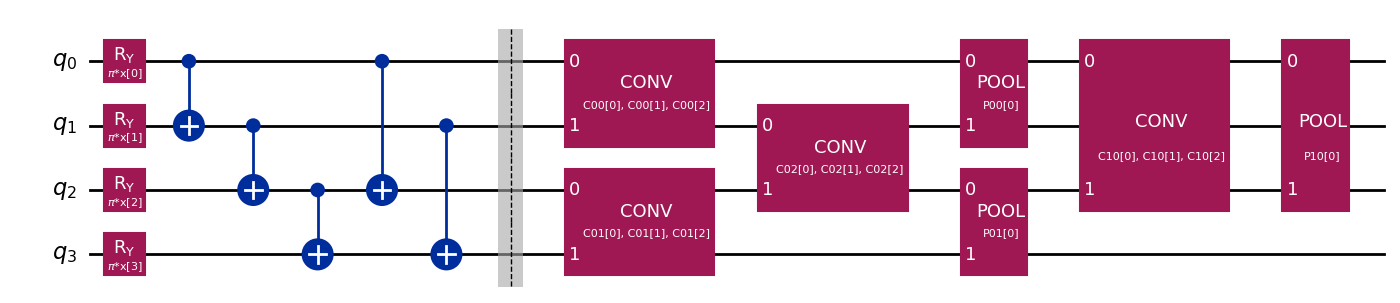

In [3]:
# Check out your quantum layer
classifier.quantum_layer.layer_qc.draw("mpl")

In [ ]:
%%time
# Get a (pre-processed) training and test set
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

# Configure model training hyper parameters
config = {
    "epochs": 10,
    "lr": 0.1,
    "batch_size": 50,
    "betas": (0.9, 0.99),
    "weight_decay": 1e-3,
    "clip_grad": True,
    "log_interval": 6,
}

# Train and plot the results
classifier.train_module(train_set, test_set, config)
classifier.plot_training_progress()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 31283007.42it/s]


Extracting ./mnist-train/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1186488.15it/s]


Extracting ./mnist-train/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 7782022.75it/s]


Extracting ./mnist-train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3144689.46it/s]


Extracting ./mnist-train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 31580798.93it/s]


Extracting ./mnist-test/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1163066.42it/s]


Extracting ./mnist-test/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8603267.45it/s]


Extracting ./mnist-test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3366412.58it/s]


Extracting ./mnist-test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist-test/MNIST/raw

epoch:   1 | loss: 0.752
lr: 0.1000 | processed     6/    6 batches per epoch in 305.87s (2.02s forward / 47.19s backward)
Model achieved 49.667%  accuracy on TRAIN set.
Model achieved 56.000%  accuracy on TEST set.

